# **TELECOM CUSTOMER CHURN PREDICTION**📈

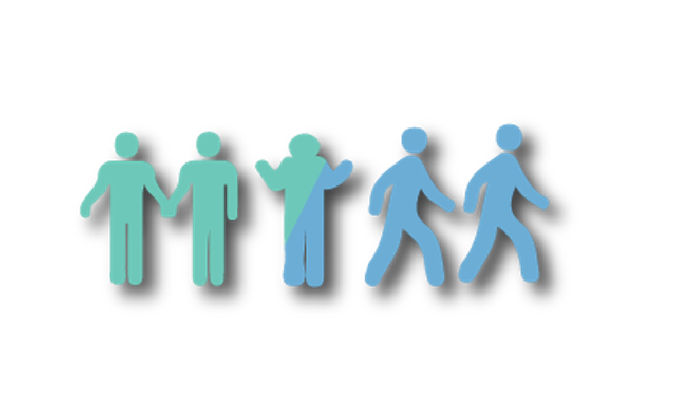

 ## Loading libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#loading data
df = pd.read_csv('customer_features.csv')

___

**[Understanding the Data](https://)**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The dataset contains:

- Churn status (whether a customer left in the last month)

- Services signed up (phone, internet, security, backup, streaming, etc.)

- Account info (tenure, contract, payment, billing, charges)

- Demographics (gender, age group, partner, dependents)

In [ ]:
df.shape

(100000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customerID        100000 non-null  object 
 1   gender            100000 non-null  object 
 2   SeniorCitizen     100000 non-null  int64  
 3   Partner           100000 non-null  object 
 4   Dependents        100000 non-null  object 
 5   tenure            100000 non-null  float64
 6   PhoneService      100000 non-null  object 
 7   MultipleLines     100000 non-null  object 
 8   InternetService   100000 non-null  object 
 9   OnlineSecurity    100000 non-null  object 
 10  OnlineBackup      100000 non-null  object 
 11  DeviceProtection  100000 non-null  object 
 12  TechSupport       100000 non-null  object 
 13  StreamingTV       100000 non-null  object 
 14  StreamingMovies   100000 non-null  object 
 15  Contract          100000 non-null  object 
 16  PaperlessBilling  100

In [ ]:
df.isnull().sum().any()

False

* No null values



```
# This is formatted as code
```

**Data Manipulation**

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["InternetService"].describe(include=['object', 'bool'])

,InternetService
count,100000
unique,3
top,Fiber optic
freq,43713


In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,100000.000000,100000.000000,100000.000000
mean,32.388123,64.733504,2285.257816
std,24.560856,30.109904,2266.352472
min,0.000000,18.250000,18.800000
25%,8.866249,35.400000,403.927032
50%,28.896313,70.388495,1398.377894
75%,55.446771,89.886200,3809.552927
max,72.000000,118.750000,8684.800000


___

**Data Visualisation**

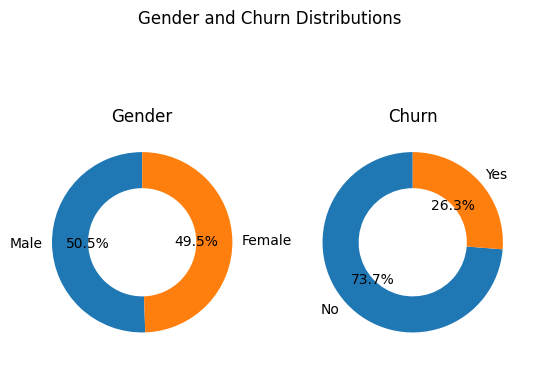

In [ ]:
# Gender distribution
gender_counts = df['gender'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title("Gender")

# Churn distribution
churn_counts = df['Churn'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title("Churn")

plt.suptitle("Gender and Churn Distributions")
plt.show()

* 26.3 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,36356
Male,37393


* Not churn users Gender wise

In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,13104
Male,13147


* Churn users Gender wise

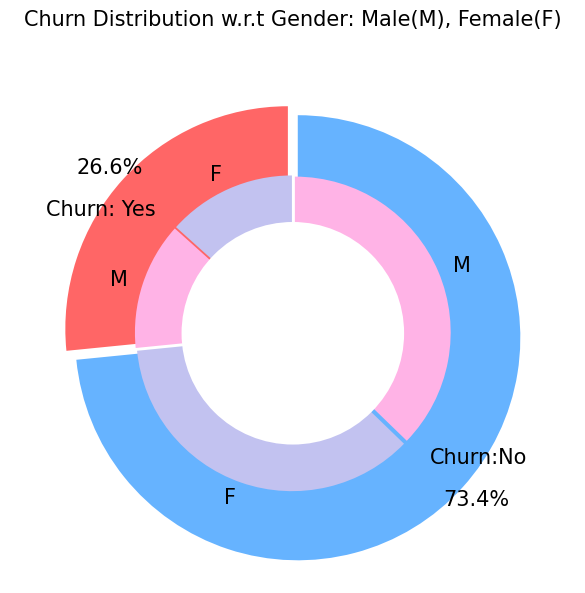

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

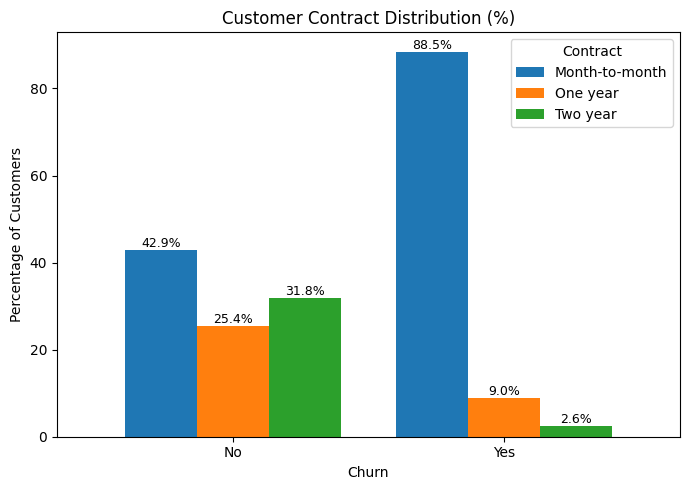

In [ ]:
# Count combinations of Churn and Contract
counts = df.groupby(["Churn", "Contract"]).size().unstack(fill_value=0)

# Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot grouped bar chart
ax = percentages.plot(kind="bar", figsize=(7,5), width=0.8)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.title("Customer Contract Distribution (%)")
plt.xlabel("Churn")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=0)
plt.legend(title="Contract")
plt.tight_layout()
plt.show()


* About 89% of customer with Month-to-Month Contract opted to move out as compared to 9% of customrs with One Year Contract and 3% with Two Year Contract

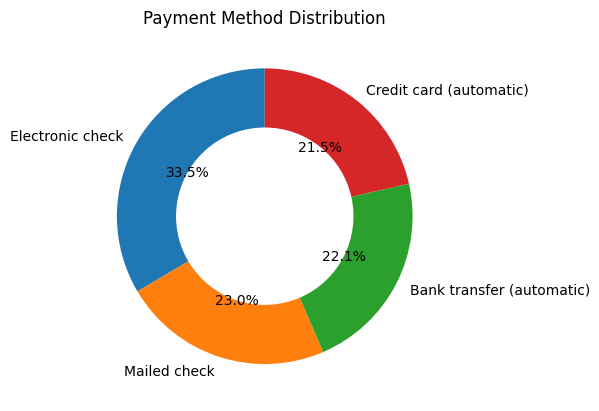

In [ ]:
# Count payment methods
counts = df['PaymentMethod'].value_counts()

# Plot donut chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title("Payment Method Distribution")
plt.show()

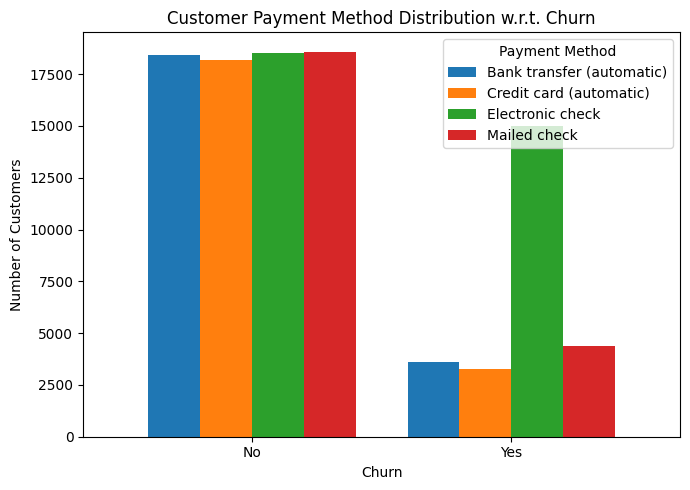

In [ ]:
# Count combinations of Churn and PaymentMethod
counts = df.groupby(["Churn", "PaymentMethod"]).size().unstack(fill_value=0)

# Plot grouped bar chart
counts.plot(kind="bar", figsize=(7,5), width=0.8)

plt.title("Customer Payment Method Distribution w.r.t. Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Payment Method")
plt.tight_layout()
plt.show()


* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

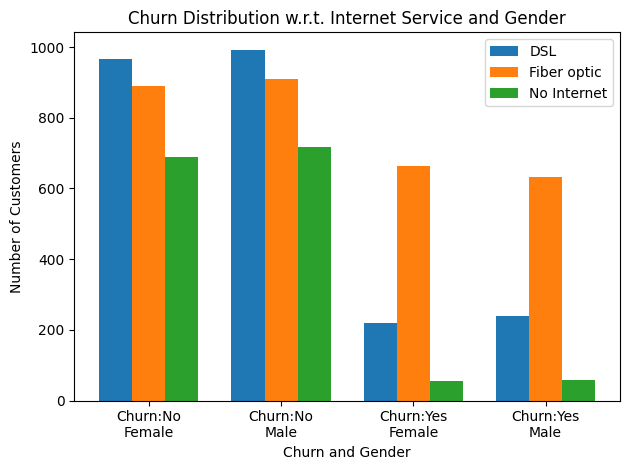

In [ ]:
# Data
x_labels = [("Churn:No", "Female"), ("Churn:No", "Male"),
            ("Churn:Yes", "Female"), ("Churn:Yes", "Male")]
x = np.arange(len(x_labels))  # positions

DSL = [965, 992, 219, 240]
Fiber = [889, 910, 664, 633]
NoInt = [690, 717, 56, 57]

width = 0.25  # bar width

# Plot bars
plt.bar(x - width, DSL, width, label="DSL")
plt.bar(x, Fiber, width, label="Fiber optic")
plt.bar(x + width, NoInt, width, label="No Internet")

# Labels & ticks
plt.xticks(x, [f"{a}\n{b}" for a, b in x_labels])
plt.xlabel("Churn and Gender")
plt.ylabel("Number of Customers")
plt.title("Churn Distribution w.r.t. Internet Service and Gender")
plt.legend()

plt.tight_layout()
plt.show()


* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

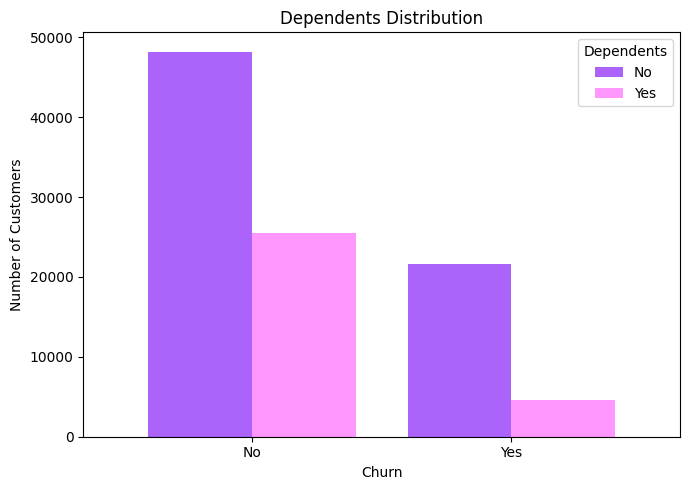

In [ ]:
# Count combinations of Churn and Dependents
counts = df.groupby(["Churn", "Dependents"]).size().unstack(fill_value=0)

# Color mapping
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Plot grouped bar chart
ax = counts.plot(kind="bar", figsize=(7,5), width=0.8, color=[color_map[col] for col in counts.columns])

plt.title("Dependents Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Dependents")
plt.tight_layout()
plt.show()


* Customers without dependents are more likely to churn



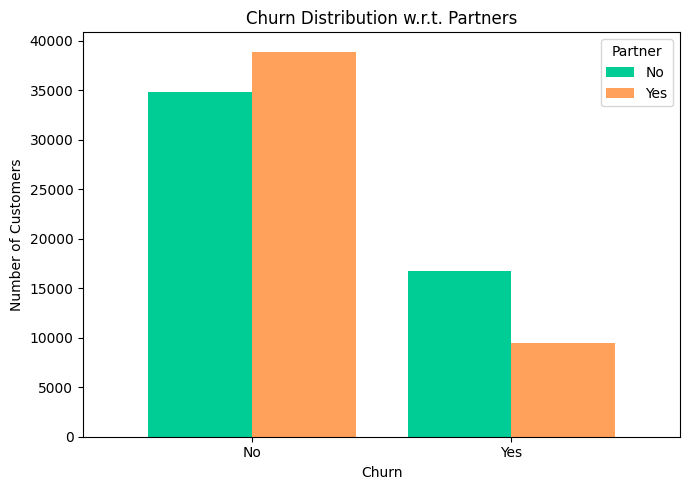

In [ ]:
# Count combinations of Churn and Partner
counts = df.groupby(["Churn", "Partner"]).size().unstack(fill_value=0)

# Color mapping
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    figsize=(7,5),
    width=0.8,
    color=[color_map[col] for col in counts.columns]
)

# Labels & formatting
plt.title("Churn Distribution w.r.t. Partners")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Partner")
plt.tight_layout()
plt.show()


* Customers that doesn't have partners are more likely to churn

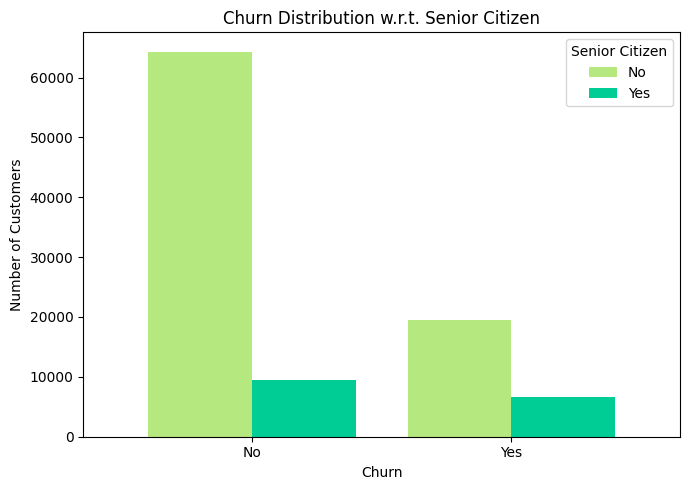

In [ ]:
# Count combinations of Churn and SeniorCitizen
counts = df.groupby(["Churn", "SeniorCitizen"]).size().unstack(fill_value=0)

# Map SeniorCitizen 0 → "No", 1 → "Yes"
counts.rename(columns={0: "No", 1: "Yes"}, inplace=True)

# Color mapping
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    figsize=(7,5),
    width=0.8,
    color=[color_map[col] for col in counts.columns]
)

# Labels & formatting
plt.title("Churn Distribution w.r.t. Senior Citizen")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Senior Citizen")
plt.tight_layout()
plt.show()

* It can be observed that the fraction of senior citizen is very less.

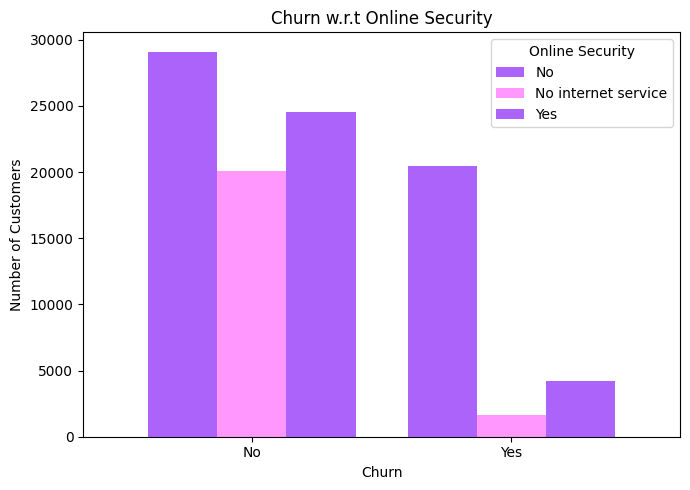

In [ ]:
# Count combinations of Churn and OnlineSecurity
counts = df.groupby(["Churn", "OnlineSecurity"]).size().unstack(fill_value=0)

# Color mapping
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    figsize=(7,5),
    width=0.8,
    color=[color_map[col] for col in counts.columns if col in color_map]
)

# Labels & formatting
plt.title("Churn w.r.t Online Security")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Online Security")
plt.tight_layout()
plt.show()

* Most customers churn in the absence of online security,

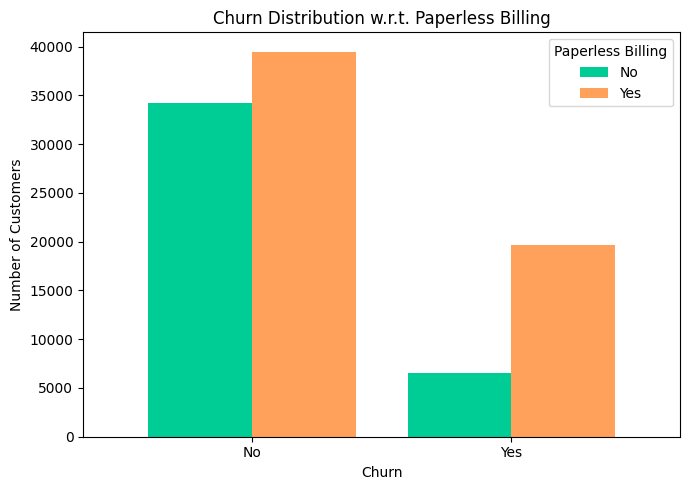

In [ ]:
# Count combinations of Churn and PaperlessBilling
counts = df.groupby(["Churn", "PaperlessBilling"]).size().unstack(fill_value=0)

# Color mapping
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    figsize=(7,5),
    width=0.8,
    color=[color_map[col] for col in counts.columns if col in color_map]
)

# Labels & formatting
plt.title("Churn Distribution w.r.t. Paperless Billing")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Paperless Billing")
plt.tight_layout()
plt.show()

* Customers with Paperless Billing are most likely to churn.

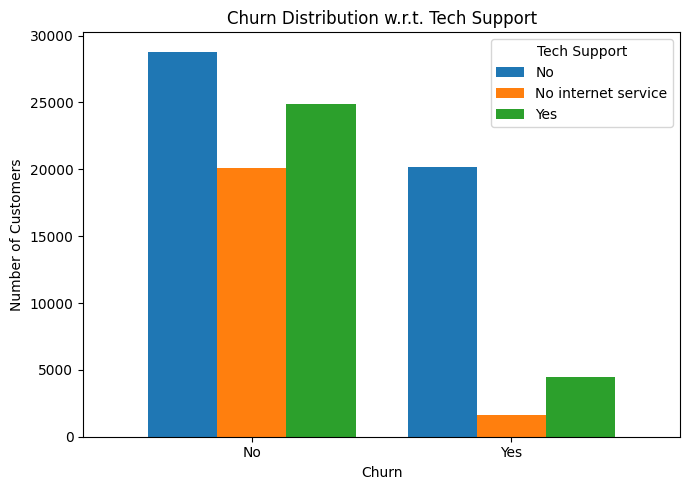

In [ ]:
# Count combinations of Churn and TechSupport
counts = df.groupby(["Churn", "TechSupport"]).size().unstack(fill_value=0)

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    figsize=(7,5),
    width=0.8
)

# Labels & formatting
plt.title("Churn Distribution w.r.t. Tech Support")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Tech Support")
plt.tight_layout()
plt.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

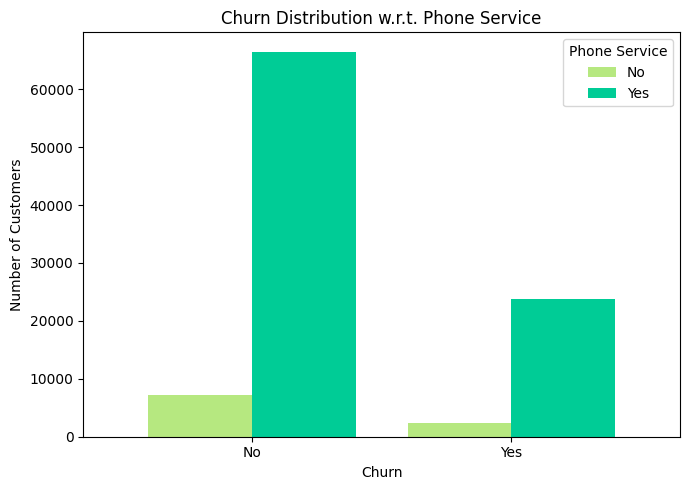

In [ ]:
# Count combinations of Churn and PhoneService
counts = df.groupby(["Churn", "PhoneService"]).size().unstack(fill_value=0)

# Color mapping
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    figsize=(7,5),
    width=0.8,
    color=[color_map[col] for col in counts.columns if col in color_map]
)

# Labels & formatting
plt.title("Churn Distribution w.r.t. Phone Service")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Phone Service")
plt.tight_layout()
plt.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

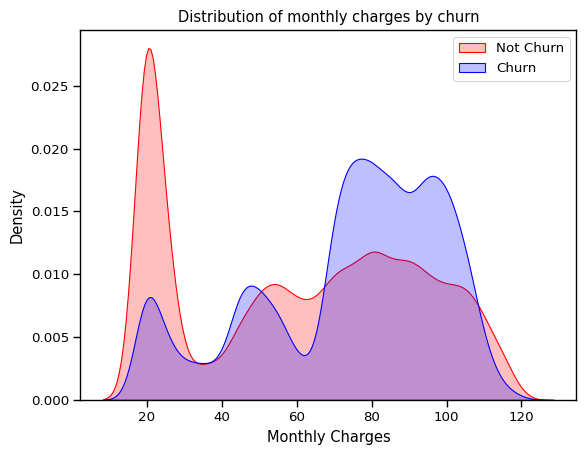

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


* Customers with higher Monthly Charges are also more likely to churn

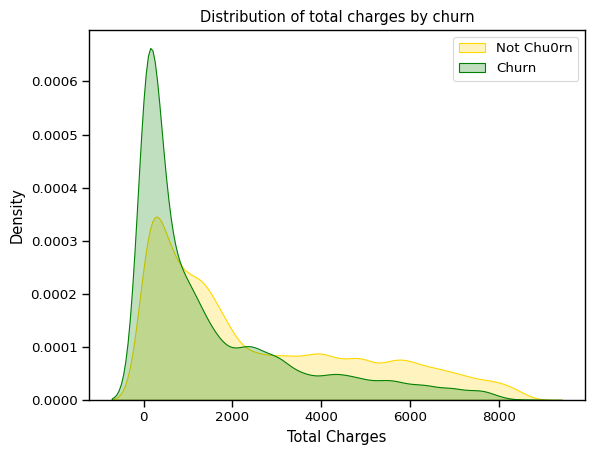

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

<Figure size 750x600 with 0 Axes>

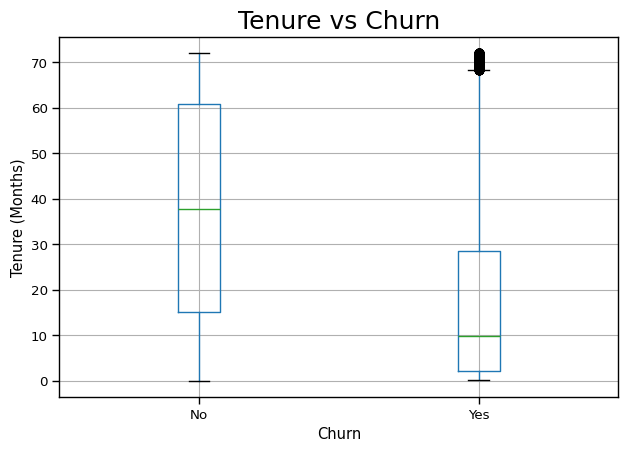

In [ ]:
# Create boxplot
plt.figure(figsize=(7.5,6))
df.boxplot(column="tenure", by="Churn")

# Labels & formatting
plt.title("Tenure vs Churn", fontsize=18)
plt.suptitle("")  # remove default "Boxplot grouped by" title
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.tight_layout()
plt.show()


* New customers are more likely to churn

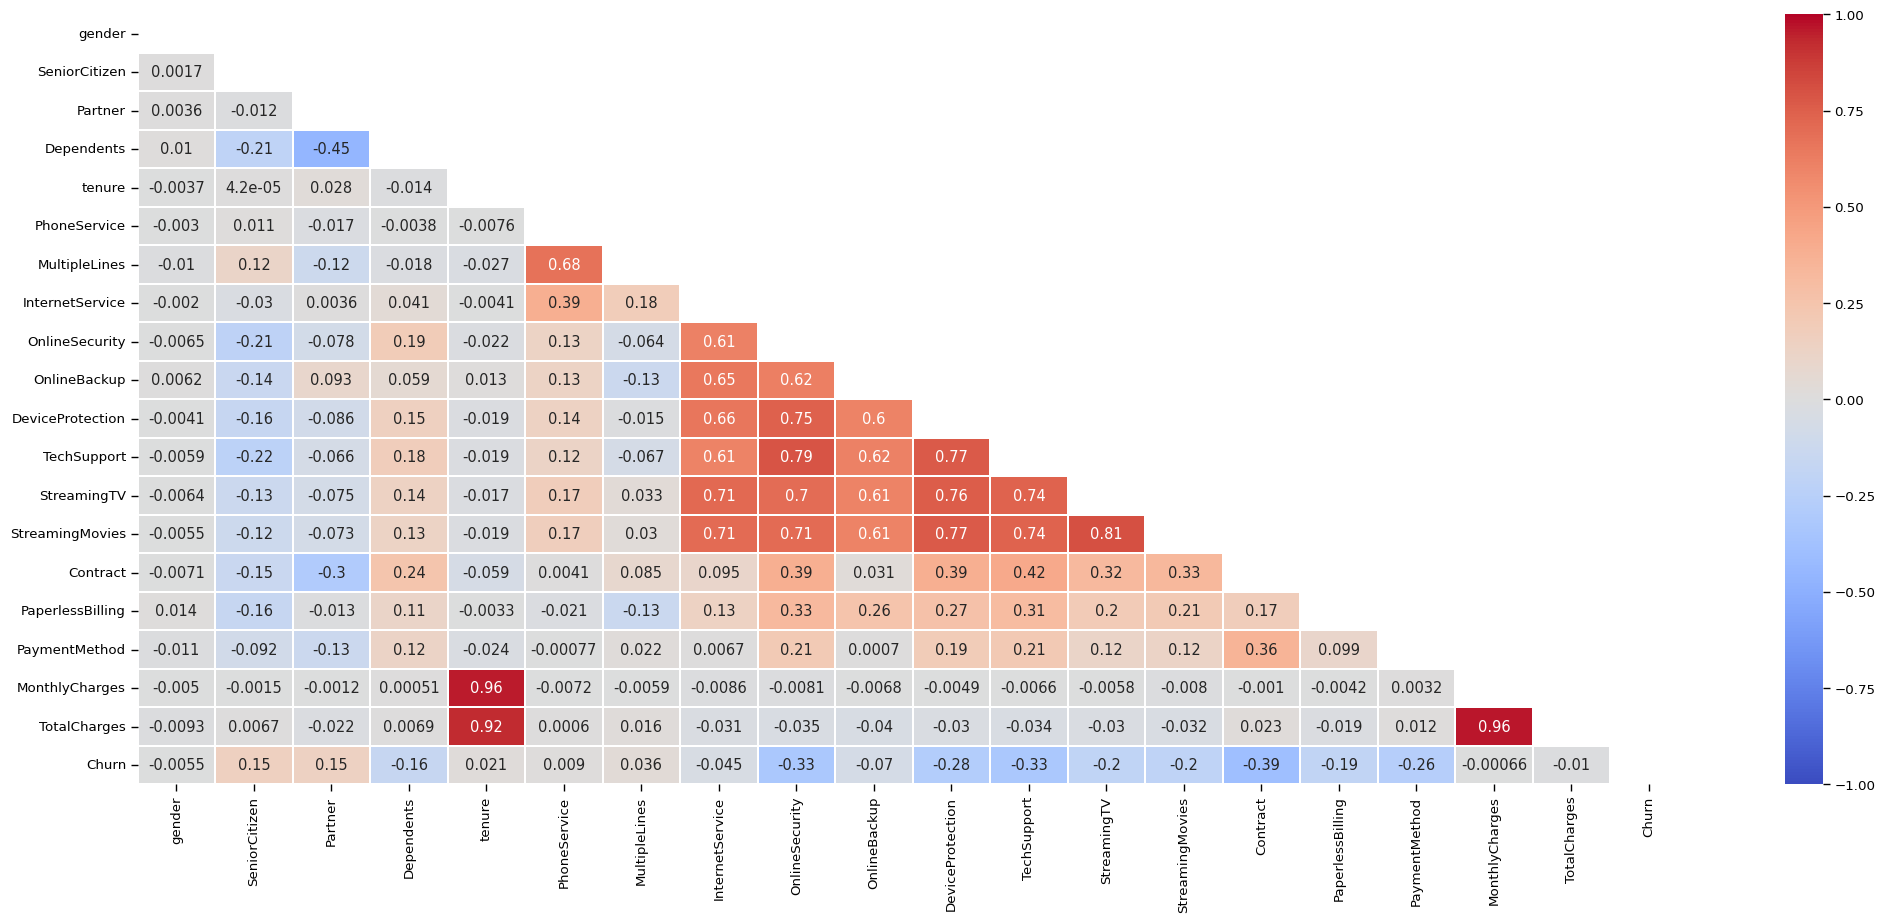

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

___

## Data Preprocessing

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
PaperlessBilling,0.191362
MonthlyCharges,0.189391
SeniorCitizen,0.152494
PaymentMethod,0.107554
MultipleLines,0.040576
PhoneService,0.009044
gender,-0.005466
StreamingTV,-0.034666
StreamingMovies,-0.039927


<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
y.shape

(100000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40,stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

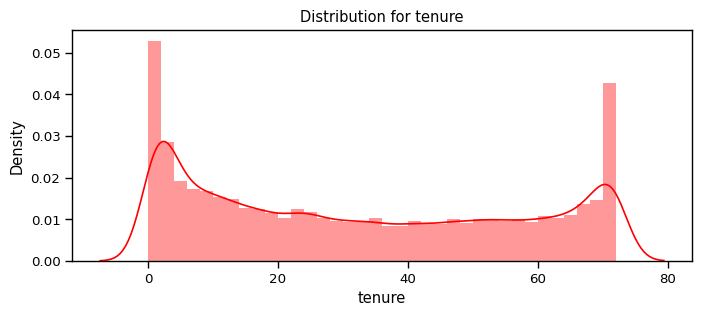

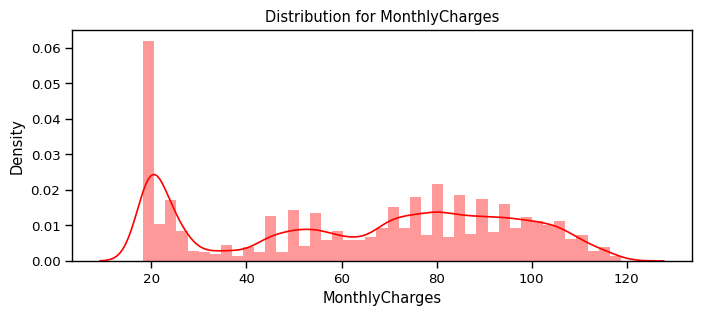

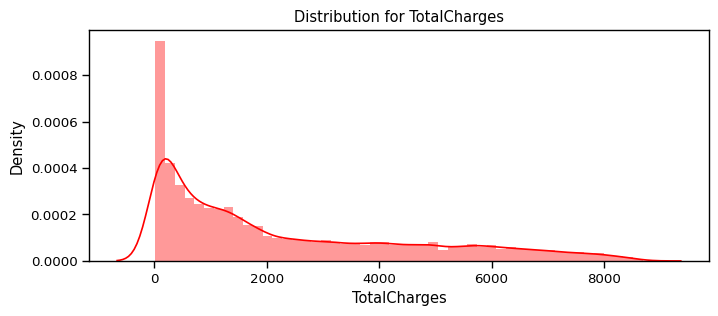

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

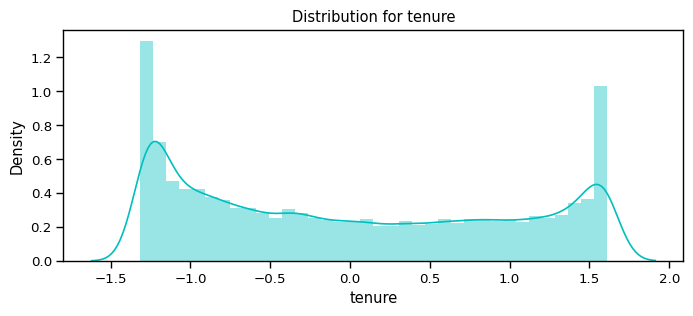

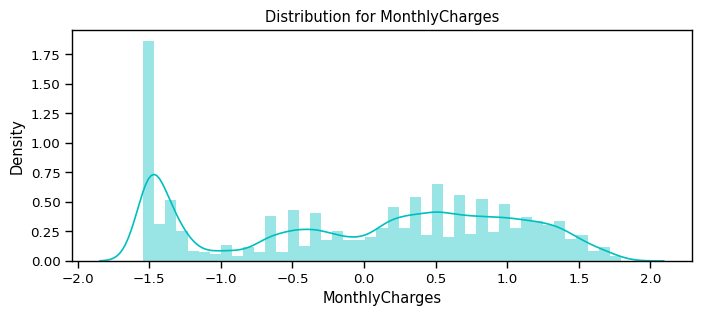

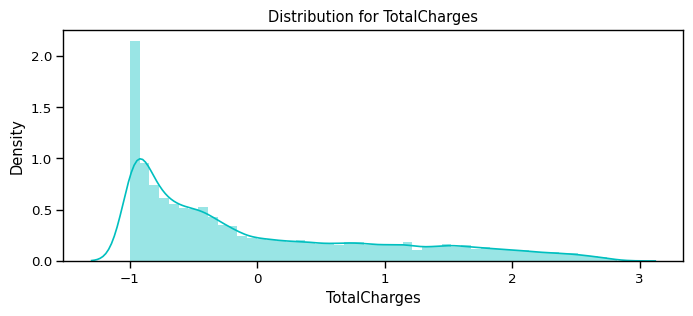

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

#cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
#cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
# scaler= StandardScaler()

# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

## Machine Learning Model Evaluations and Predictions

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.9675333333333334


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22125
           1       0.93      0.95      0.94      7875

    accuracy                           0.97     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000



<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy_RandForest = metrics.accuracy_score(y_test, prediction_test)
print (accuracy_RandForest)

0.8160333333333334


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     22125
           1       0.71      0.51      0.59      7875

    accuracy                           0.82     30000
   macro avg       0.77      0.72      0.74     30000
weighted avg       0.81      0.82      0.81     30000



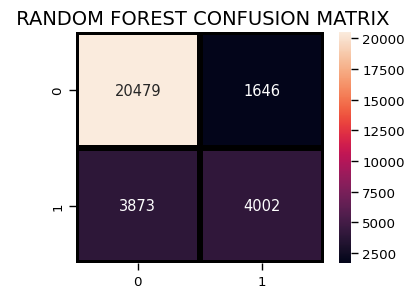

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8072


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     22125
           1       0.66      0.55      0.60      7875

    accuracy                           0.81     30000
   macro avg       0.75      0.72      0.74     30000
weighted avg       0.80      0.81      0.80     30000



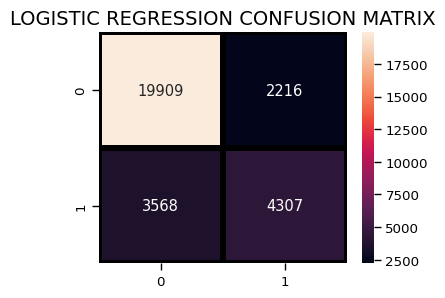

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.9649333333333333


Decision tree gives very low score.

In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     22125
           1       0.93      0.93      0.93      7875

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000



<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8067333333333333

In [ ]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     22125
           1       0.66      0.54      0.59      7875

    accuracy                           0.81     30000
   macro avg       0.75      0.72      0.73     30000
weighted avg       0.80      0.81      0.80     30000



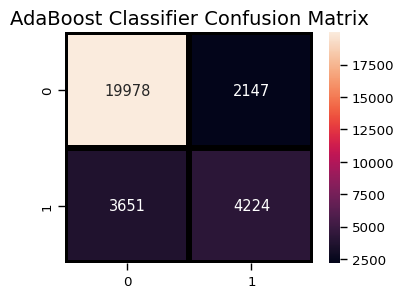

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8170333333333333


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     22125
           1       0.69      0.54      0.61      7875

    accuracy                           0.82     30000
   macro avg       0.77      0.73      0.74     30000
weighted avg       0.81      0.82      0.81     30000



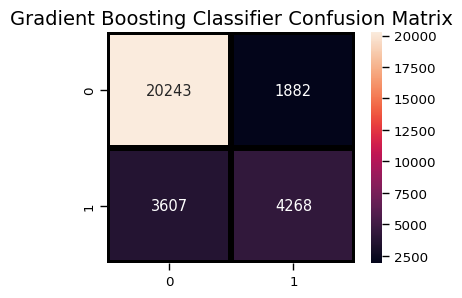

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting ROC AUC Score: 0.8678885925925927


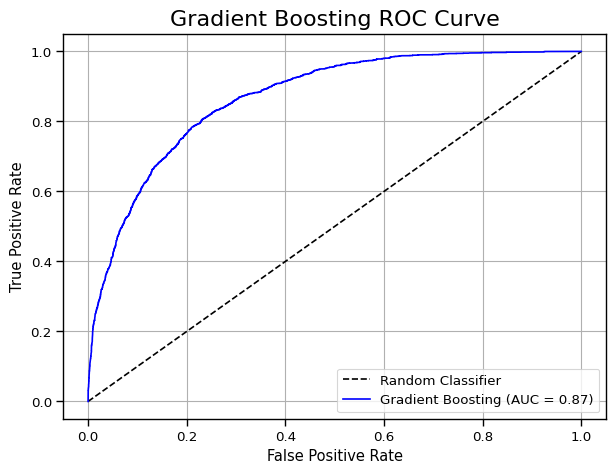

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

gb_pred_prob = gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, gb_pred_prob)
auc_score = roc_auc_score(y_test, gb_pred_prob)
print("Gradient Boosting ROC AUC Score:", auc_score)

plt.figure(figsize=(7, 5))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Diagonal line
plt.plot(fpr, tpr, color='blue', label=f'Gradient Boosting (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Collect accuracies
results = {
    "Model": ["KNN", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Accuracy": [
        accuracy_knn,
        accuracy_lr,
        accuracy_dt,
        accuracy_RandForest,
        metrics.accuracy_score(y_test, gb_pred)
    ]
}

# Create DataFrame
accuracy_df = pd.DataFrame(results)

print(accuracy_df)

                 Model  Accuracy
0                  KNN  0.967533
1  Logistic Regression  0.807200
2        Decision Tree  0.964933
3        Random Forest  0.816033
4    Gradient Boosting  0.817033


KNN (96.75%) and Decision Tree (96.48%) show the highest accuracy, but these may be overfitting (too good to be true compared to others).

Gradient Boosting (81.7%) and Random Forest (81.6%) perform similarly, slightly better than Logistic Regression (80.7%), and are more likely to generalize better.

Overall, while KNN/Decision Tree top the list in accuracy, Gradient Boosting / Random Forest are usually more reliable for real-world predictions.

👉 Best choice: Gradient Boosting or Random Forest for balanced performance and generalization.

In [ ]:
# Predict churn probabilities (probability of "Yes")
churn_probs = gb.predict_proba(X_test)[:, 1]

# Create dataset with Customer_ID and Churn_Probability
churn_df = pd.DataFrame({
    "Customer_ID": X_test.index,   # assuming index holds customer IDs
    "Churn_Probability": churn_probs
})

# Preview
print(churn_df.head())

   Customer_ID  Churn_Probability
0        35315           0.889067
1        87996           0.849918
2        20107           0.065770
3        13979           0.030065
4        67307           0.841531


In [ ]:
# Save to CSV
# churn_df.to_csv("churn_probabilities.csv", index=False)

# print("✅ Churn probabilities saved to churn_probabilities.csv")

In [ ]:
# import joblib

# # Save the scaler too, since you transformed data
# joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
# !pip install numpy==1.26.4
# import numpy as np
# print(np.__version__)  # should now show 1.26.4


1.26.4


In [ ]:
# import joblib

# # Save the model
# joblib.dump(gb, "churn_model.pkl")
# print("✅ Model saved as churn_model.pkl")


✅ Model saved as churn_model.pkl


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# import joblib

# encoders = {}
# for col in df.columns:
#     if df[col].dtype == 'int64' or df[col].dtype == 'float64':
#         continue
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     encoders[col] = le

# # Save the encoders
# joblib.dump(encoders, "encoders.pkl")
# joblib.dump(df.columns.tolist(), "feature_order.pkl")


['feature_order.pkl']

In [ ]:
# print(pd.__version__)

2.2.2
